In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

import numpy as np
import matplotlib.pyplot as plt
from time import time
import shutil

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [ ]:
train_images.shape

(60000, 28, 28)

5


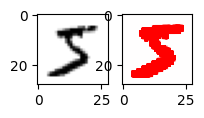

In [ ]:
print(train_labels[0])
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0], cmap='bwr', vmin=-1, vmax=1)

In [ ]:
# NORMALIZAMOS DATOS
train_images = train_images / 255
test_images = test_images / 255

mean_img = train_images.mean(axis=0)
train_images = train_images - mean_img
test_images = test_images - mean_img

5


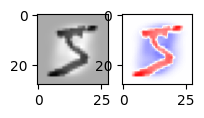

In [ ]:
print(train_labels[0])
plt.figure(figsize=(2,2))
plt.subplot(1,2,1)
plt.imshow(train_images[0], cmap=plt.cm.binary)
plt.subplot(1,2,2)
plt.imshow(train_images[0], cmap='bwr', vmin=-1, vmax=1)

------------- MODELO ------------- 

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28), name="entrada"))
model.add(keras.layers.Dense(units = 30, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))

#model.add(keras.layers.BatchNormalization())
#model.add(keras.layers.Activation(activation = "relu"))
#model.add(keras.layers.Dense(units = 30, activation = 'relu', kernel_regularizer=keras.regularizers.l2(0.01)))

model.add(keras.layers.Dense(10, activation="softmax", name="salida"))

In [ ]:
model.summary()
# tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)

-------- COMPILADOR -------- 

In [ ]:
model.compile(
            optimizer   = keras.optimizers.Adam(learning_rate=0.01), 
            loss        = 'sparse_categorical_crossentropy',
            metrics     =['acc']
            )

------- ENTRENAMIENTO --------

In [ ]:
nepochs = 30

In [ ]:
history = model.fit(train_images, 
                    train_labels, 
                    epochs=nepochs, 
                    validation_data=(test_images, test_labels),
                    batch_size=1000)

Epoch 1/30
60/60 [==============================] - 1s 20ms/step - loss: 0.2704 - acc: 0.9506 - val_loss: 0.2805 - val_acc: 0.9491
Epoch 2/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2739 - acc: 0.9511 - val_loss: 0.2575 - val_acc: 0.9552
Epoch 3/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2746 - acc: 0.9501 - val_loss: 0.2730 - val_acc: 0.9508
Epoch 4/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2745 - acc: 0.9507 - val_loss: 0.2568 - val_acc: 0.9555
Epoch 5/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2676 - acc: 0.9517 - val_loss: 0.2657 - val_acc: 0.9517
Epoch 6/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2737 - acc: 0.9500 - val_loss: 0.2731 - val_acc: 0.9519
Epoch 7/30
60/60 [==============================] - 1s 17ms/step - loss: 0.2727 - acc: 0.9507 - val_loss: 0.2532 - val_acc: 0.9572
Epoch 8/30
60/60 [==============================] - 1s 18ms/step - loss: 0.2709 - a

--------- VISUALIZACION RESULTADOS -----------

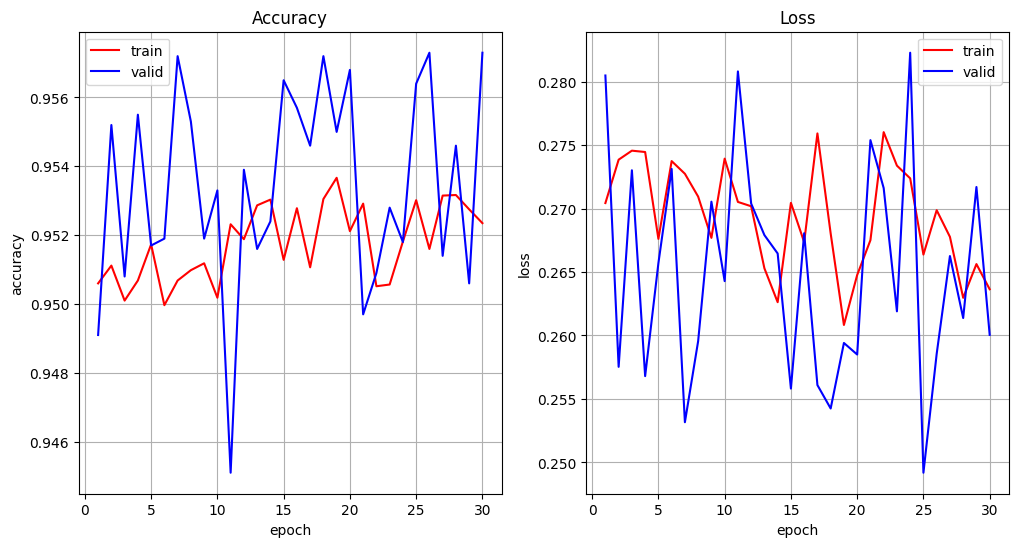

In [ ]:
hd = history.history

epochs = range(1, nepochs+1)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(epochs, hd['acc'], "r", label="train")
plt.plot(epochs, hd['val_acc'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(epochs, hd['loss'], "r", label="train")
plt.plot(epochs, hd['val_loss'], "b", label="valid")
plt.grid(True)
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Loss")
plt.legend()

plt.show()

In [ ]:
loss_test, acc_test = model.evaluate(test_images, test_labels)
print("Loss on test set = %f" % (loss_test))
print("Accuracy on test set = %f" % (acc_test))

313/313 [==============================] - 4s 13ms/step - loss: 0.2600 - acc: 0.9573
Loss on test set = 0.260049
Accuracy on test set = 0.957300


------------- PREDICCION ------------- 

In [ ]:
predictions = model.predict(test_images)

313/313 [==============================] - 2s 7ms/step


In [ ]:
y_test = np.argmax(predictions, axis=1)
aciertos = y_test == test_labels
acc_v2 = np.mean(aciertos)
print("Accuracy on test set (v2)= %f" % (acc_v2))

Accuracy on test set (v2)= 0.957300


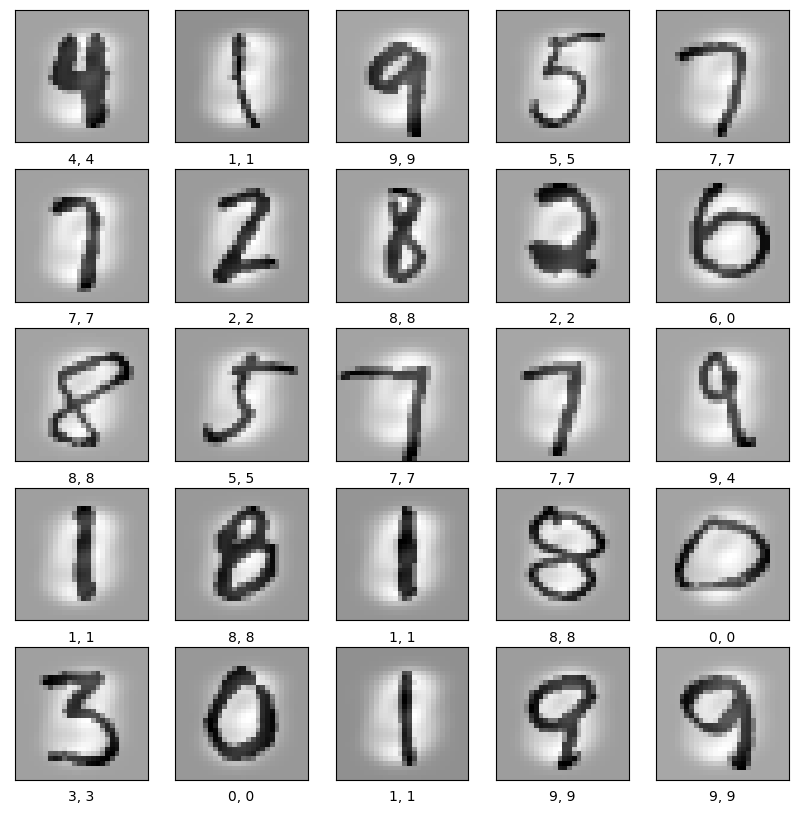

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    ite = i + 250
    plt.imshow(test_images[ite], cmap=plt.cm.binary)
    plt.xlabel("%d, %d" % (test_labels[ite], y_test[ite]))

----------- MATRIZ DE CONFUSION -----------

In [ ]:
confusion_matrix(test_labels, y_test)

array([[ 965,    1,    1,    1,    0,    2,    3,    1,    3,    3],
       [   0, 1117,    2,    4,    0,    0,    1,    2,    9,    0],
       [   4,    0,  997,    5,    5,    1,    1,    7,   12,    0],
       [   1,    1,   12,  955,    0,   19,    0,    6,   10,    6],
       [   1,    0,    4,    0,  946,    1,    4,    2,    4,   20],
       [   6,    0,    4,   15,    3,  843,    6,    2,    7,    6],
       [   6,    2,   11,    1,    6,   12,  916,    0,    4,    0],
       [   1,    6,   15,    1,    1,    0,    1,  976,    8,   19],
       [   3,    4,    6,    9,   11,    8,    8,    4,  913,    8],
       [   3,    4,    1,    9,   22,    3,    1,   14,    7,  945]],
      dtype=int64)